In [1]:
import numpy as np

from scipy.io import loadmat
from scipy import optimize

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn import svm

%load_ext autoreload
%autoreload 2

In [2]:
np.random.seed(0)

In [3]:
file_path_1 = '../course_materials/ex6data1.mat'
file_path_2 = '../course_materials/ex6data2.mat'
file_path_3 = '../course_materials/ex6data3.mat'

In [4]:
data_1 = loadmat(file_path_1)
data_2 = loadmat(file_path_2)
data_3 = loadmat(file_path_3)
print (data_3.keys())
print (data_3['Xval'].shape)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])
(200, 2)


# 1 Support Vector Machine (the crazy bit of machine learning)

## 1.1 Data Extraction and Transformation

In [5]:
def get_data(file_path, xLabel, yLabel):
    data = loadmat(file_path)
    X = data[xLabel]
    y = data[yLabel]
    return X, y

# def get_β(n_variables):
#     β = np.zeros(n_variables)
#     return β

In [6]:
X, y = get_data(file_path_1, 'X', 'y')
print(X.shape)
print(y.shape)

(51, 2)
(51, 1)


## 1.2 Data Visualisation

In [7]:
def visualiseData(file_path, xLabel, yLabel, title):
    X, y = get_data(file_path, 'X', 'y')
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,:1],
                X[:,1:],
                c = y)
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    return plt.show()

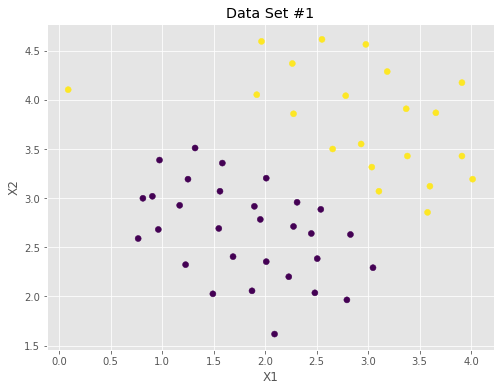

In [8]:
visualiseData(file_path_1, 'X', 'y', "Data Set #1")

## 1.3 Decision Boundary Visualisation

In [9]:
def decision_boundary(SVMfit, X, y, xyMin, xyMax, step, xLabel, yLabel, title):
    plt.figure(figsize=(8,6))
    data = plt.scatter(X[:,:1],
                       X[:,1:],
                       c = y)
    
    xx = np.linspace(xyMin[0], xyMax[0], step)
    yy = np.linspace(xyMin[1], xyMax[1], step)
    XX, YY = np.meshgrid(xx, yy)
    XY = np.concatenate((XX.reshape(step**2,-1), YY.reshape(step**2,-1)), axis=1)
    ZZ = SVMfit.decision_function(XY).reshape(step, -1)
    
    decision_boundary = plt.contour(xx, yy, ZZ,
                                   levels=[-1, 0, 1],
                                   linestyles=['--', '-', '--'])
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    return plt.show()

## 1.4 SVM Using Linear Kernel

In [10]:
X, y = get_data(file_path_1, 'X', 'y')
linearSVM = svm.LinearSVC(C=1)
# linearSVM = svm.SVC(kernel='linear', C=1)
linearSVM.fit(X, y.flatten())

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

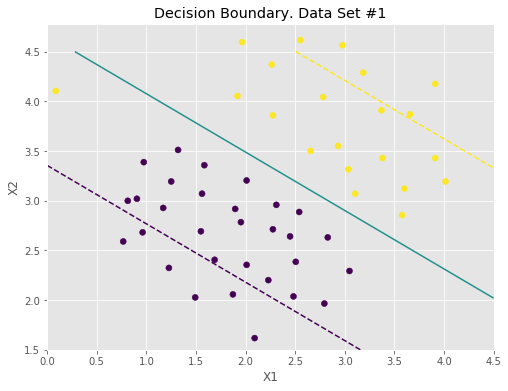

In [11]:
xyMin = (0., 1.5)
xyMax = (4.5, 4.5)
step = 50
xLabel = "X1"
yLabel = "X2"
title = "Decision Boundary. Data Set #1"

decision_boundary(linearSVM, X, y, xyMin, xyMax, step, xLabel, yLabel, title)

## 1.4 SVM Using Gaussian Kernel
**Gaussian Kernel** $K_G = {exp}{(-\frac{\sum {(x_i-x_j)^2}}{2\cdot \σ^2})} = {exp}{(-\frac{\lVert x_i-x_j \rVert^2}{2\cdot \σ^2})}$<br />

Using custom kernels with SciKitLearn SVM (http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html)

In [12]:
def gaussianKernel(x1, x2, σ):
    return np.exp(-np.dot((x1-x2).T,(x1-x2))/(2*σ**2))[0][0]

### 1.4.1 Test Gaussian Kernel
x1 = np.array([[1],[2],[1]])<br />
x2 =np.array([[0],[4],[-1]])<br />
σ = 2.<br />
The expected out put value is **0.324652** (Andrew Ng)

In [13]:
x1 = np.array([[1],[2],[1]])
x2 =np.array([[0],[4],[-1]])
σ = 2.
print(gaussianKernel(x1, x2, σ))

0.32465246735834974


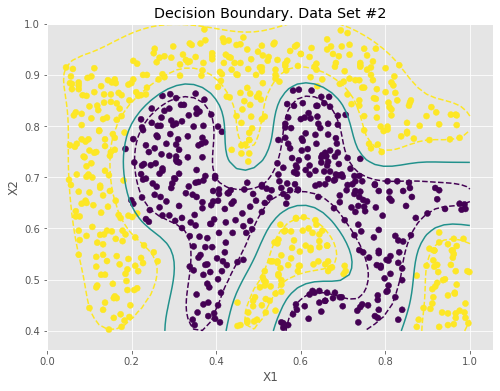

In [14]:
X_2, y_2 = get_data(file_path_2, 'X', 'y')

σ = 0.1
gaussianSVM_2 = svm.SVC(C=1, kernel='rbf', gamma=σ**(-2))
gaussianSVM_2.fit( X_2, y_2.flatten())
# gaussianSVM_2.fit( X_2, y_2)
xyMin_2 = (0., .4)
xyMax_2 = (1., 1.)
step_2 = 50
xLabel_2 = "X1"
yLabel_2 = "X2"
title_2 = "Decision Boundary. Data Set #2"

decision_boundary(gaussianSVM_2, X_2, y_2, xyMin_2, xyMax_2, step_2, xLabel_2, yLabel_2, title_2)

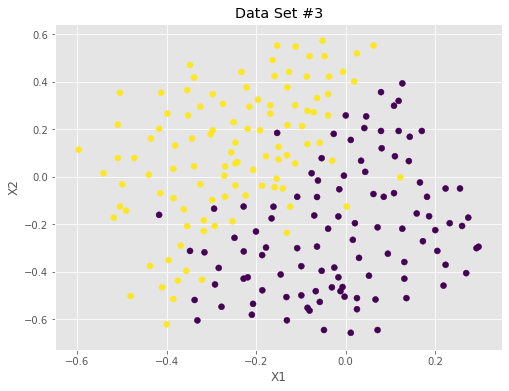

In [15]:
visualiseData(file_path_3, 'X', 'y', "Data Set #3")

(211, 2)
σ 0.3


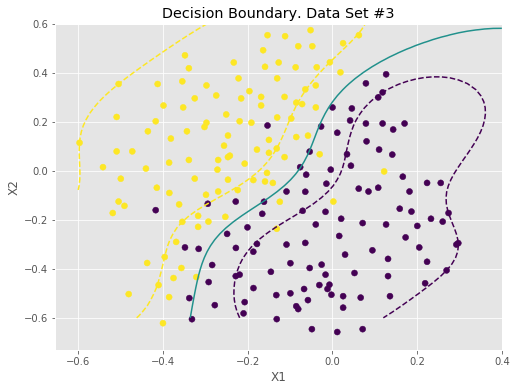

In [16]:
X_3, y_3 = get_data(file_path_3, 'X', 'y')
print(X_3.shape)

xyMin_3 = (-.6, -.6)
xyMax_3 = (.4, .6)
step_3 = 50
xLabel_3 = "X1"
yLabel_3 = "X2"
title_3 = "Decision Boundary. Data Set #3"


for σ in [0.3] :#[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    print(f"σ {σ}")
    gaussianSVM_3 = svm.SVC(C=1, kernel='rbf', gamma=σ**(-2))
    gaussianSVM_3.fit( X_3, y_3.flatten())
    decision_boundary(gaussianSVM_3, X_3, y_3, xyMin_3, xyMax_3, step_3, xLabel_3, yLabel_3, title_3)

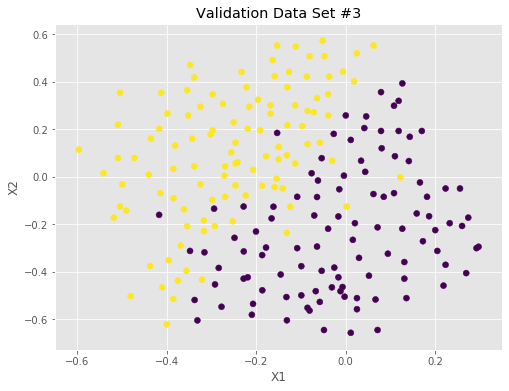

In [17]:
visualiseData(file_path_3, 'Xval', 'yval', "Validation Data Set #3")

(200, 2)


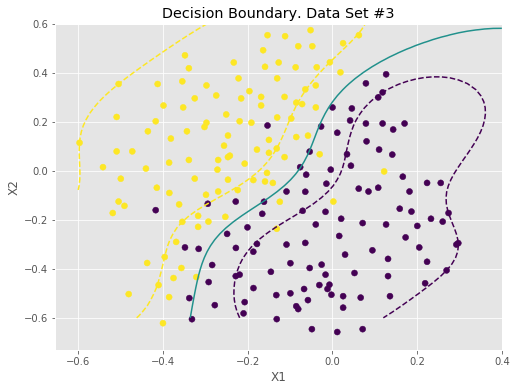

In [18]:
X_3val, y_3val = get_data(file_path_3, 'Xval', 'yval')
print(X_3val.shape)

xyMin_3val = (-.6, -.6)
xyMax_3val = (.4, .6)
step_3val = 50
xLabel_3val = "X1"
yLabel_3val = "X2"
title_3val = "Decision Boundary. Data Set #2"

decision_boundary(gaussianSVM_3, X_3, y_3, xyMin_3, xyMax_3, step_3, xLabel_3, yLabel_3, title_3)